In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [2]:
x_initial = tf.constant(1.0)
y_initial = tf.constant(1.0)
X_t1 = tf.Variable(x_initial)
Y_t1 = tf.Variable(y_initial)
t_delta = tf.placeholder(tf.float32, shape=())
a = tf.placeholder(tf.float32, shape=())
b = tf.placeholder(tf.float32, shape=())
c = tf.placeholder(tf.float32, shape=())
d = tf.placeholder(tf.float32, shape=())

In [3]:
X_t2 = X_t1 + (a * X_t1 + b * X_t1 * Y_t1) * t_delta
Y_t2 = Y_t1 + (c * Y_t1 + d * X_t1 * Y_t1) * t_delta
step = tf.group(
  X_t1.assign(X_t2),
  Y_t1.assign(Y_t2))

In [4]:
init = tf.global_variables_initializer()
sess.run(init)
prey_values = []
predator_values = []
for i in range(1000):
    step.run({a: (2./3.), b: (-4./3.), c: -1.0, d: 1.0, t_delta: 0.01}, session=sess)
    temp_prey, temp_pred = sess.run([X_t1, Y_t1])
    prey_values.append(temp_prey)
    predator_values.append(temp_pred)

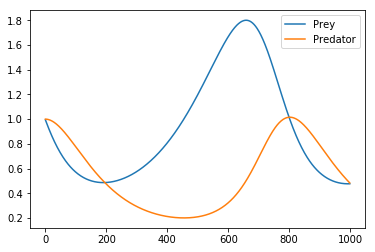

In [5]:
plt.plot(prey_values)
plt.plot(predator_values)
plt.legend(['Prey', 'Predator'], loc='upper right')
plt.show()